<div style="display:block" direction=rtl align=right><br><br>
    <div  style="width:100%;margin:100;display:block"  display=block align=center>
        <img width=130 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
        <img width=170 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
        <span><br><font size=5>University of Tehran , school of ECE</font></span>
        <span><br><font size=3>Data Analytics Course</font></span>
        <span><br><font size=3>Fall 2022</font></span>
    </div><br><br><br>
    <div style="display:block" align=left display=block> 
        <font size=3>Homework 2</font><br>
        <hr />
        <font size=3>TA: <a href="mailto:mersad.esalati@gmail.com">Mersad Esalati</a><br></font><br>
    </div>
</div>

# Selenium

In [92]:
import time
from selenium import webdriver
from selenium.webdriver.common import keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from tqdm import tqdm
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

## Weather Info Crawler
Daily Weather Information:
- Temperature (°F) - only Avg metric
- Dew Point (°F) - only Avg metric
- Humidity (%) - only Avg metric
- Wind Speed (mph) - only Avg metric
- Pressure (in) - only Avg metric
- Precipitation (in) - only Avg metric
- date

In [16]:
# crawl data + save into csv files
driver = webdriver.Chrome(executable_path=r'C:\Users\Sara Rostami.D\Documents\Data Analysis\hw2\chromedriver')

datas = []
for month in range(12):
 
    driver.get(f"https://www.wunderground.com/history/monthly/us/va/arlington/KDCA/date/2021-{month+1}")


    time.sleep(12)

    table = pd.read_html(driver.find_element("xpath" , '//table[@class="days ng-star-inserted"]').get_attribute('outerHTML'))[0]
    

    temperature  = []
    dewPoint = []
    humidity = []
    windSpeed = []
    pressure = []
    precipitation = []
    date = []
    month_length =len(table.iloc[0,0].split()) - 2
    list_temp = table.iloc[0,1].split()
    list_dew = table.iloc[0,2].split()
    list_humidity = table.iloc[0,3].split()
    list_windSpeed = table.iloc[0,4].split()
    list_pressure = table.iloc[0,5].split()
    list_precipitation = table.iloc[0,6].split()
    i = 0
    while i < month_length:
        if month+1 < 10:
            if i+1 < 10:
                date.append(f'2021-0{month+1}-0{i+1}')
            else:
                date.append(f'2021-0{month+1}-{i+1}')
        else:
            if i+1 < 10:
                date.append(f'2021-{month+1}-0{i+1}')
            else:
                date.append(f'2021-{month+1}-{i+1}')

        temperature.append(float(list_temp[i*3+4]))
        dewPoint.append(float(list_dew[i*3+4]))
        humidity.append(float(list_dew[i*3+4]))
        windSpeed.append(float(list_humidity[i*3+4]))
        pressure.append(float(list_windSpeed[i*3+4])) 
        precipitation.append(float(list_precipitation[i+1])) 
        i+=1

    dic = {'date': date, 'temperature': temperature, 'dewPoint': dewPoint , 'humidity': humidity, 'windSpeed': windSpeed, 'pressure': pressure, 'precipitation': precipitation}
    df = pd.DataFrame( dic , columns=['date','temperature','dewPoint','humidity','windSpeed','pressure','precipitation' ])
    datas.append(df)




c:\Users\Sara Rostami.D\.conda\envs\base2\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  


### save the .csv files

In [20]:
for i,data in enumerate(datas):
    data.to_csv(f'month_{i+1}.csv',index = False)

## Download Capitalbikeshare Data
You can write script for download and extracting files or do it manualy.

In [ ]:
### I downloaded it

## Question 1: Merge Weather Info Dataframes

In [23]:
year_weather_data = pd.concat(datas, ignore_index= True)
year_weather_data

,date,temperature,dewPoint,humidity,windSpeed,pressure,precipitation
0,2021-01-01,37.4,32.2,32.2,82.6,7.8,0.00
1,2021-01-02,43.8,38.5,38.5,83.4,7.0,0.81
2,2021-01-03,40.5,37.4,37.4,89.1,7.8,0.19
3,2021-01-04,40.4,34.3,34.3,79.9,5.9,0.09
4,2021-01-05,40.9,35.2,35.2,80.5,6.9,0.00
...,...,...,...,...,...,...,...
358,2021-12-27,41.3,31.0,31.0,67.0,6.5,0.00
359,2021-12-28,48.2,32.8,32.8,59.2,4.5,0.00
360,2021-12-29,50.2,40.5,40.5,70.1,5.0,0.00
361,2021-12-30,50.6,47.8,47.8,90.0,4.3,0.26


## Question 2: Merge Capitalbikeshare Dataframes

In [49]:
# loading the files in a list of dataframes
bikesharing = []
for i in range(1,13):
    if i < 10:
        x = '0'+ str(i)
    else:
        x = i
    bikesharing.append(pd.read_csv(f'2021{x}-capitalbikeshare-tripdata.csv'))

c:\Users\Sara Rostami.D\.conda\envs\base2\lib\site-packages\IPython\core\interactiveshell.py:3257: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [50]:
# concatenating the dataframes into a single one
year_bikesharing = pd.concat(bikesharing, ignore_index= True)
year_bikesharing

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,13A48BD20CC3DD85,classic_bike,2021-01-08 17:58:48,2021-01-08 18:25:23,Connecticut Ave & Yuma St NW,31318,Georgia Ave & Emerson St NW,31405,38.947156,-77.065115,38.949662,-77.027333,casual
1,CA68C580B32EEE66,electric_bike,2021-01-08 22:05:51,2021-01-08 22:23:52,8th & D St NW,31270,14th & D St SE,31663,38.894804,-77.023091,38.884053,-76.986043,member
2,5A925307814D5C2B,classic_bike,2021-01-21 17:20:31,2021-01-21 17:23:24,Wilson Blvd. & N. Vermont St.,31926,George Mason Dr & Wilson Blvd,31036,38.879477,-77.114563,38.878870,-77.120700,member
3,B6B2DB54A2B233EE,classic_bike,2021-01-28 10:06:30,2021-01-28 10:20:54,Franklin St & S Washington St,31907,Braddock Rd Metro,31047,38.798133,-77.048700,38.814577,-77.052808,member
4,921A142D5C8A9759,classic_bike,2021-01-11 12:09:45,2021-01-11 12:20:15,St. Asaph & Montgomery St,31931,Braddock Rd Metro,31047,38.814185,-77.043809,38.814577,-77.052808,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2749876,8C999F60CA429723,classic_bike,2021-12-15 18:26:44,2021-12-15 18:34:25,14th & Belmont St NW,31119,14th & Rhode Island Ave NW,31203,38.921074,-77.031887,38.908600,-77.032300,casual
2749877,CA9B6486BDC1D25A,electric_bike,2021-12-15 00:45:55,2021-12-15 00:49:46,14th & Belmont St NW,31119,14th & Irving St NW,31124,38.920981,-77.031653,38.928552,-77.032224,casual
2749878,95957793A0807E8B,classic_bike,2021-12-06 14:17:45,2021-12-06 14:29:26,15th & P St NW,31201,14th & Irving St NW,31124,38.909801,-77.034427,38.928552,-77.032224,member
2749879,99DA9A8F72185C79,docked_bike,2021-12-29 14:59:01,2021-12-29 16:29:40,10th St & L'Enfant Plaza SW,31287,10th St & L'Enfant Plaza SW,31287,38.884323,-77.026010,38.884323,-77.026010,casual


## Question 3: Data Cleaning

In [51]:
# a
year_bikesharing.dropna(inplace=True)
year_bikesharing = year_bikesharing.reset_index(drop=True)
year_bikesharing

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,13A48BD20CC3DD85,classic_bike,2021-01-08 17:58:48,2021-01-08 18:25:23,Connecticut Ave & Yuma St NW,31318,Georgia Ave & Emerson St NW,31405,38.947156,-77.065115,38.949662,-77.027333,casual
1,CA68C580B32EEE66,electric_bike,2021-01-08 22:05:51,2021-01-08 22:23:52,8th & D St NW,31270,14th & D St SE,31663,38.894804,-77.023091,38.884053,-76.986043,member
2,5A925307814D5C2B,classic_bike,2021-01-21 17:20:31,2021-01-21 17:23:24,Wilson Blvd. & N. Vermont St.,31926,George Mason Dr & Wilson Blvd,31036,38.879477,-77.114563,38.878870,-77.120700,member
3,B6B2DB54A2B233EE,classic_bike,2021-01-28 10:06:30,2021-01-28 10:20:54,Franklin St & S Washington St,31907,Braddock Rd Metro,31047,38.798133,-77.048700,38.814577,-77.052808,member
4,921A142D5C8A9759,classic_bike,2021-01-11 12:09:45,2021-01-11 12:20:15,St. Asaph & Montgomery St,31931,Braddock Rd Metro,31047,38.814185,-77.043809,38.814577,-77.052808,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2454498,8C999F60CA429723,classic_bike,2021-12-15 18:26:44,2021-12-15 18:34:25,14th & Belmont St NW,31119,14th & Rhode Island Ave NW,31203,38.921074,-77.031887,38.908600,-77.032300,casual
2454499,CA9B6486BDC1D25A,electric_bike,2021-12-15 00:45:55,2021-12-15 00:49:46,14th & Belmont St NW,31119,14th & Irving St NW,31124,38.920981,-77.031653,38.928552,-77.032224,casual
2454500,95957793A0807E8B,classic_bike,2021-12-06 14:17:45,2021-12-06 14:29:26,15th & P St NW,31201,14th & Irving St NW,31124,38.909801,-77.034427,38.928552,-77.032224,member
2454501,99DA9A8F72185C79,docked_bike,2021-12-29 14:59:01,2021-12-29 16:29:40,10th St & L'Enfant Plaza SW,31287,10th St & L'Enfant Plaza SW,31287,38.884323,-77.026010,38.884323,-77.026010,casual


In [47]:
#b
x = pd.to_datetime(year_bikesharing['started_at'], format='%Y-%m-%d', errors='coerce').isnull().sum()
y = pd.to_datetime(year_bikesharing['ended_at'], format='%Y-%m-%d', errors='coerce').isnull().sum()
print('number of rows with incorrect format in \"started at\" column: ', x)
print('number of rows with incorrect format in \"ended at\" column: ', y)

number of rows with incorrect format in "started at" column:  0
number of rows with incorrect format in "ended at" column:  0


In [52]:
#c
year_bikesharing = year_bikesharing[year_bikesharing['started_at'].str[:10] == year_bikesharing['ended_at'].str[:10]]
year_bikesharing = year_bikesharing.reset_index(drop=True)
year_bikesharing

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,13A48BD20CC3DD85,classic_bike,2021-01-08 17:58:48,2021-01-08 18:25:23,Connecticut Ave & Yuma St NW,31318,Georgia Ave & Emerson St NW,31405,38.947156,-77.065115,38.949662,-77.027333,casual
1,CA68C580B32EEE66,electric_bike,2021-01-08 22:05:51,2021-01-08 22:23:52,8th & D St NW,31270,14th & D St SE,31663,38.894804,-77.023091,38.884053,-76.986043,member
2,5A925307814D5C2B,classic_bike,2021-01-21 17:20:31,2021-01-21 17:23:24,Wilson Blvd. & N. Vermont St.,31926,George Mason Dr & Wilson Blvd,31036,38.879477,-77.114563,38.878870,-77.120700,member
3,B6B2DB54A2B233EE,classic_bike,2021-01-28 10:06:30,2021-01-28 10:20:54,Franklin St & S Washington St,31907,Braddock Rd Metro,31047,38.798133,-77.048700,38.814577,-77.052808,member
4,921A142D5C8A9759,classic_bike,2021-01-11 12:09:45,2021-01-11 12:20:15,St. Asaph & Montgomery St,31931,Braddock Rd Metro,31047,38.814185,-77.043809,38.814577,-77.052808,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440598,8C999F60CA429723,classic_bike,2021-12-15 18:26:44,2021-12-15 18:34:25,14th & Belmont St NW,31119,14th & Rhode Island Ave NW,31203,38.921074,-77.031887,38.908600,-77.032300,casual
2440599,CA9B6486BDC1D25A,electric_bike,2021-12-15 00:45:55,2021-12-15 00:49:46,14th & Belmont St NW,31119,14th & Irving St NW,31124,38.920981,-77.031653,38.928552,-77.032224,casual
2440600,95957793A0807E8B,classic_bike,2021-12-06 14:17:45,2021-12-06 14:29:26,15th & P St NW,31201,14th & Irving St NW,31124,38.909801,-77.034427,38.928552,-77.032224,member
2440601,99DA9A8F72185C79,docked_bike,2021-12-29 14:59:01,2021-12-29 16:29:40,10th St & L'Enfant Plaza SW,31287,10th St & L'Enfant Plaza SW,31287,38.884323,-77.026010,38.884323,-77.026010,casual


## Question 4: Join Dataframes

In [116]:
year_bikesharing['date'] = year_bikesharing['started_at'].str[:10]
bike_weather = pd.merge(year_weather_data ,year_bikesharing , on='date')
bike_weather

,date,temperature,dewPoint,humidity,windSpeed,pressure,precipitation,day_x,ride_id,rideable_type,...,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_counts_per_day,day_y
0,2021-01-01,37.4,32.2,32.2,82.6,7.8,0.00,01-01,51C4E89E50034E81,classic_bike,...,32054,East West Hwy & 16th St,32056,38.999679,-77.051168,38.995681,-77.038721,member,770,01-01
1,2021-01-01,37.4,32.2,32.2,82.6,7.8,0.00,01-01,63674B5E645028A2,classic_bike,...,31606,Pennsylvania & Minnesota Ave SE,31805,38.880300,-76.986200,38.873057,-76.971015,casual,770,01-01
2,2021-01-01,37.4,32.2,32.2,82.6,7.8,0.00,01-01,6B05648F4898B983,classic_bike,...,31121,Eckington Pl & Q St NE,31505,38.923583,-77.050046,38.910972,-77.004950,member,770,01-01
3,2021-01-01,37.4,32.2,32.2,82.6,7.8,0.00,01-01,893E206F88CE6159,classic_bike,...,31280,18th & M St NW,31221,38.913761,-77.027025,38.905067,-77.041779,member,770,01-01
4,2021-01-01,37.4,32.2,32.2,82.6,7.8,0.00,01-01,77527841135374E9,docked_bike,...,32025,14th & Upshur St NW,31406,38.975000,-77.011210,38.942475,-77.032678,casual,770,01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2420743,2021-12-31,53.1,49.7,49.7,88.3,5.4,0.01,12-31,D9F8955D832733C6,classic_bike,...,31606,Columbus Circle / Union Station,31623,38.880300,-76.986200,38.896960,-77.004930,member,5127,12-31
2420744,2021-12-31,53.1,49.7,49.7,88.3,5.4,0.01,12-31,285CB2C6B51F80EF,classic_bike,...,31201,15th & W St NW,31125,38.909801,-77.034427,38.919018,-77.034449,member,5127,12-31
2420745,2021-12-31,53.1,49.7,49.7,88.3,5.4,0.01,12-31,0497E71BD8EB0CB3,classic_bike,...,31668,Independence Ave & L'Enfant Plaza SW/DOE,31633,38.871841,-77.005910,38.887312,-77.025762,member,5127,12-31
2420746,2021-12-31,53.1,49.7,49.7,88.3,5.4,0.01,12-31,F0DD5D05136E1D55,classic_bike,...,31502,John McCormack Dr & Michigan Ave NE,31502,38.934600,-76.995500,38.934600,-76.995500,member,5127,12-31


## Question 5: Histograms

### Humidity

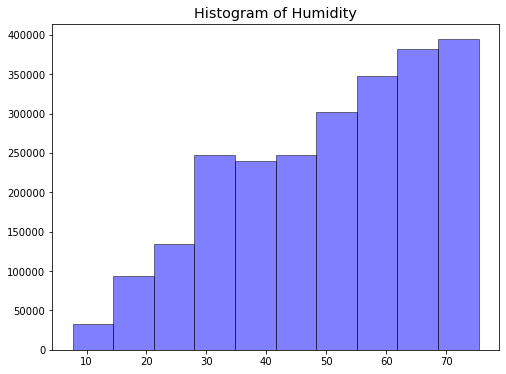

In [58]:
plt.figure(figsize=(8,6))
plt.hist(bike_weather.humidity,facecolor='blue', alpha=0.5,edgecolor = "black")
plt.style.use('ggplot')
plt.title("Histogram of Humidity") 
plt.show();

### Temperature

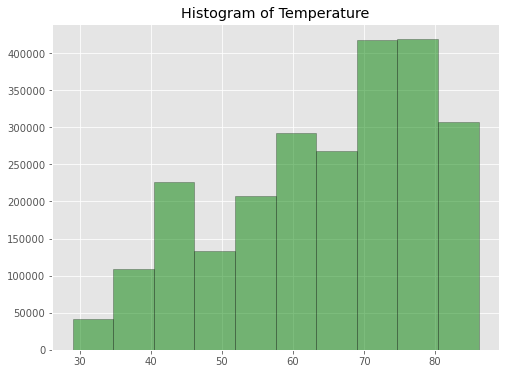

In [60]:
plt.figure(figsize=(8,6))
plt.hist(bike_weather.temperature,facecolor='green', alpha=0.5,edgecolor = "black")
plt.style.use('ggplot')
plt.title("Histogram of Temperature") 
plt.show();

## Question 6: Line Plot

In [78]:
year_weather_data = year_weather_data.sort_values(by ='date',ignore_index=True)
year_weather_data['day'] = year_weather_data['date'].str[5:]

In [84]:
year_bikesharing['trip_counts_per_day'] = year_bikesharing.groupby('date')['date'].transform('count')
year_bikesharing = year_bikesharing.sort_values(by ='date',ignore_index=True)
year_bikesharing['day'] = year_bikesharing['date'].str[5:]
year_bikesharing.sample(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,trip_counts_per_day,day
2110981,1FD6FF25E4308CF5,classic_bike,2021-11-08 11:57:30,2021-11-08 12:04:32,4th & East Capitol St NE,31618,14th & D St SE,31663,38.889955,-77.000349,38.884058,-76.986385,member,2021-11-08,8566,11-08
493115,019D8648B396A526,docked_bike,2021-05-02 08:41:43,2021-05-02 09:12:28,Franklin St & S Washington St,31907,National Harbor Carousel,32423,38.798133,-77.048700,38.785900,-77.016700,casual,2021-05-02,8447,05-02
1880982,89D337FC92717D54,classic_bike,2021-10-14 09:28:51,2021-10-14 09:34:33,Stadium Armory Metro,31665,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613,38.885483,-76.977187,38.884095,-76.995234,member,2021-10-14,10448,10-14
1054234,F7AEFEA480D0E762,classic_bike,2021-07-13 10:09:37,2021-07-13 10:12:34,Wisconsin Ave & O St NW,31312,Potomac & M St NW,31295,38.908490,-77.063586,38.905368,-77.065149,casual,2021-07-13,8051,07-13
1247812,69BDD9CFACDF7CC8,classic_bike,2021-08-04 20:44:50,2021-08-04 21:00:06,22nd St & Constitution Ave NW,31292,California St & Florida Ave NW,31116,38.892441,-77.048947,38.917761,-77.040620,member,2021-08-04,9083,08-04


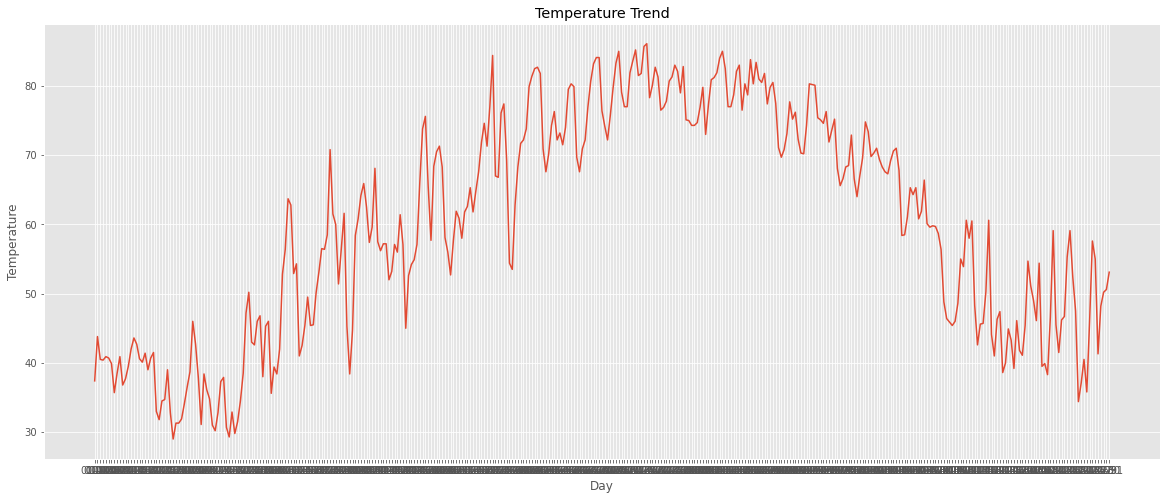

In [89]:
plt.figure(figsize=(20,8))
plt.plot(year_weather_data.day , year_weather_data.temperature)
plt.title("Temperature Trend")
plt.xlabel("Day")
plt.ylabel("Temperature");

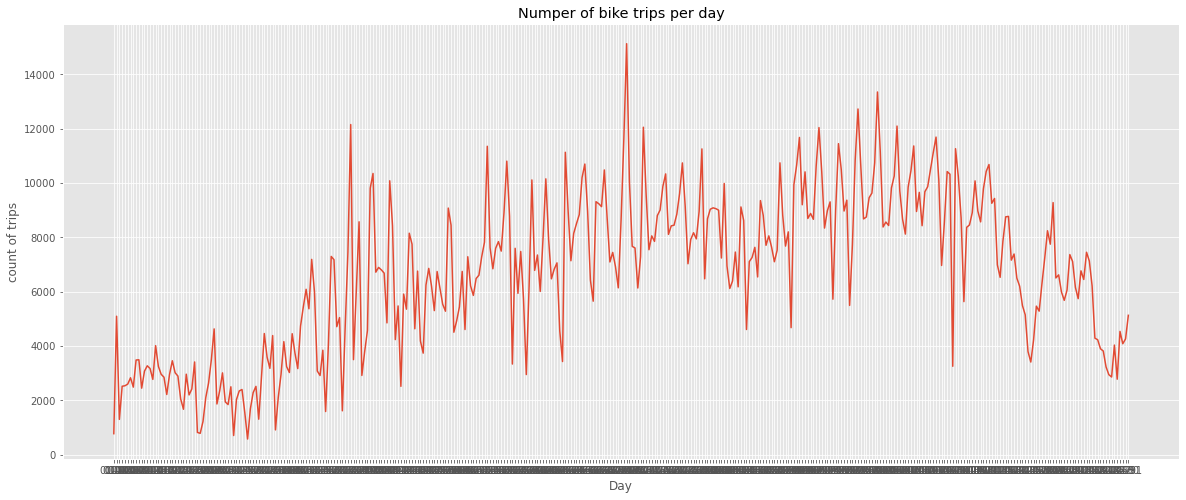

In [90]:
plt.figure(figsize=(20,8))
plt.plot(year_bikesharing.day , year_bikesharing.trip_counts_per_day)
plt.title("Numper of bike trips per day")
plt.xlabel("Day")
plt.ylabel("count of trips");

## because the scale of "trip count" and "temperature" is different, we normalize the data & show them is a single plot

In [142]:
plot_df = bike_weather['date'].value_counts(sort=False).to_frame()
plot_df = plot_df.sort_index(ascending=True)
x =  list((year_weather_data['temperature'] /year_weather_data['temperature'].abs().max()).to_frame()['temperature'])
plot_df['temperature'] = x
plot_df.rename(columns={"date": "trip_counts_per_day"},inplace=True)
plot_df['trip_counts_per_day'] = plot_df['trip_counts_per_day'] /plot_df['trip_counts_per_day'].abs().max()
plot_df

,trip_counts_per_day,temperature
2021-01-01,0.050909,0.434379
2021-01-02,0.336727,0.508711
2021-01-03,0.085686,0.470383
2021-01-04,0.166347,0.469222
2021-01-05,0.167537,0.475029
...,...,...
2021-12-27,0.183471,0.479675
2021-12-28,0.299835,0.559814
2021-12-29,0.269752,0.583043
2021-12-30,0.281587,0.587689


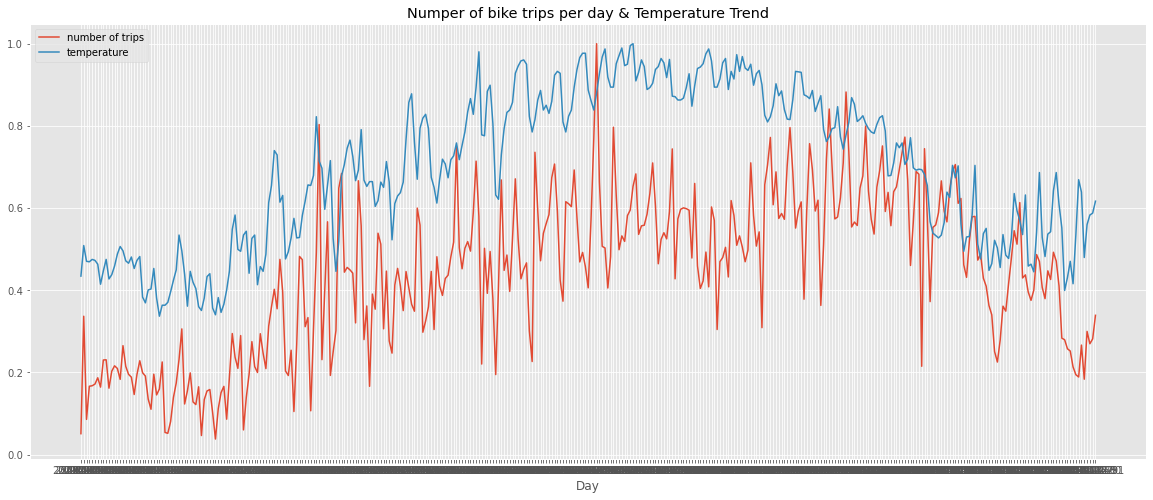

In [143]:
plt.figure(figsize=(20,8))
plt.plot(plot_df.trip_counts_per_day , label ='number of trips')
plt.plot(plot_df.temperature , label ='temperature')
plt.title("Numper of bike trips per day & Temperature Trend")
plt.xlabel("Day")
plt.legend(loc="upper left" )